# Assignment 2: Neural Networks: Backpropagation Algorithm Implementation


## Introduction

In this assignment, you will implement the backpropagation algorithm for a simple neural network. You'll be working with the Wine Quality dataset, which is a bit more challenging than typical introductory datasets. Your task is to complete the missing parts of the code to create a functioning neural network that can predict wine quality based on various features.


## Setup

First, let's import the necessary libraries and load our data:

In [120]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt


# Load the Wine Quality dataset

In [121]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=";")



# Split features and target

In [122]:
X = data.drop('quality', axis=1).values
y = data['quality'].values

# Normalize the features

In [123]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Ensure y has shape (batch_size, 1)
# Normalize the target variable to [0, 1]
scaler_y = MinMaxScaler()
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)




# Split the data



```
`# This is formatted as code`
```

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to numpy arrays

In [124]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# Ensure y has shape (batch_size, 1)


## Neural Network Class

- Now, let's define our Neural Network class. You'll need to complete the missing parts:

In [125]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases with Xavier initialization
        self.W1 = np.random.randn(self.input_size, self.hidden_size) / np.sqrt(self.input_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) / np.sqrt(self.hidden_size)
        self.b2 = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # x is the output of the sigmoid function
        return x * (1 - x)

    def forward(self, X):
        # Hidden layer
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.sigmoid(self.Z1)

        # Output layer
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        output = self.sigmoid(self.Z2)
        return output

    def backward(self, X, y, output, learning_rate):
        # Compute the output layer error
        output_error = output - y
        output_delta = output_error * self.sigmoid_derivative(output)

        # Compute the hidden layer error
        hidden_error = np.dot(output_delta, self.W2.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.A1)

        # Update weights and biases using gradients
        self.W2 -= np.dot(self.A1.T, output_delta) * learning_rate
        self.b2 -= np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.W1 -= np.dot(X.T, hidden_delta) * learning_rate
        self.b1 -= np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate


    def train(self, X, y, learning_rate, epochs):
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)

            # Backward pass
            self.backward(X, y, output, learning_rate)

            # Print loss every 100 epochs
            if epoch % 100 == 0:
                loss = np.mean(np.square(y - output))
                print(f"Epoch {epoch+1}/{epochs}, Loss: {loss}")

    def predict(self, X):
        return self.forward(X)


# Create and train the neural network

In [126]:
input_size = X_train.shape[1]
hidden_size = 10
output_size = 1
y = y.reshape(-1, 1)  # Reshape y to be a column vector


nn = NeuralNetwork(input_size, hidden_size, output_size)
nn.train(X_train, y_train_scaled, learning_rate=0.01, epochs=1000)

Epoch 1/1000, Loss: 0.03533385377039965
Epoch 101/1000, Loss: 0.018270973402347672
Epoch 201/1000, Loss: 0.016611616994261634
Epoch 301/1000, Loss: 0.016383703478750594
Epoch 401/1000, Loss: 0.01617036710400159
Epoch 501/1000, Loss: 0.01593225389921197
Epoch 601/1000, Loss: 0.01567892617670102
Epoch 701/1000, Loss: 0.01659442624653268
Epoch 801/1000, Loss: 0.01578523681262034
Epoch 901/1000, Loss: 0.01538111854380172


# Make predictions

In [127]:
# Make predictions for training and test sets
train_predictions = nn.predict(X_train)
test_predictions = nn.predict(X_test)

train_predictions = scaler_y.inverse_transform(nn.predict(X_train))
test_predictions = scaler_y.inverse_transform(nn.predict(X_test))


# Calculate MSE

In [128]:
# Calculate Mean Squared Error (MSE) for training and testing predictions
train_mse = np.mean(np.square(y_train - train_predictions))
test_mse = np.mean(np.square(y_test - test_predictions))

# Print the MSE results
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Train MSE: 0.3838263222156152
Test MSE: 0.35689598752055424


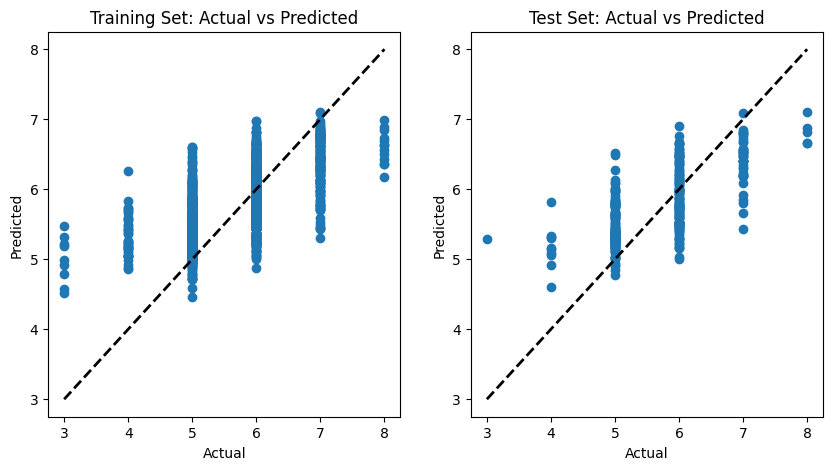

In [129]:
import matplotlib.pyplot as plt

# Plot actual vs predicted for the training set
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, train_predictions)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Set: Actual vs Predicted')

# Plot actual vs predicted for the test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Set: Actual vs Predicted')

plt.show()


## Tasks

1. Implement the `forward` method to perform the forward pass through the network.
2. Implement the `backward` method to perform backpropagation and calculate gradients.
3. Complete the `train` method to update weights and biases using the calculated gradients.
4. Implement the `predict` method to make predictions using the trained network.
5. Run the entire notebook and report the final Train and Test MSE.
6. Experiment with different hyperparameters (learning rate, number of epochs, hidden layer size) and observe their effects on the model's performance.

## Submission

Submit your completed Jupyter notebook along with a brief report (max 500 words) discussing:
1. Your implementation choices
2. The challenges you faced
3. The effects of different hyperparameters on the model's performance
4. Suggestions for improving the model further

Good luck!